In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image # to load images

In [6]:
# Different details of objects
flower = "/content/drive/MyDrive/CV-lab1-photos/flower.jpeg"
newyork = "/content/drive/MyDrive/CV-lab1-photos/newyork.jpg"

# Different contrasts
universe = "/content/drive/MyDrive/CV-lab1-photos/universe.jpg"
golf = "/content/drive/MyDrive/CV-lab1-photos/golf.jpg"
! ls drive/MyDrive/CV-lab1-photos/

 flower.jpeg  'lab1 CV.gdoc'   textures.png
 golf.jpg      newyork.jpg     universe.jpg


In [7]:
def convolve(input, kernel):
    input_h, input_w = len(input), len(input[0])
    kernel_h, kernel_w = len(kernel), len(kernel[0])
    output_h, output_w = input_h - kernel_h + 1, input_w - kernel_w + 1
    output = np.zeros((output_h, output_w))
    for i in range(output_h):
        for j in range(output_w):
            pixel_sum = 0
            for k in range(kernel_h):
                for l in range(kernel_w):
                    pixel_sum += input[i + k][j + l] * kernel[k][l]
            output[i][j] = pixel_sum 

    return output

def vis(image):
  plt.figure(figsize=(20, 10))
  plt.imshow(image,  cmap="gray")

def get_image(file_name):
  np.array(Image.open(file_name).convert('L'))

(667, 1000)
(367, 550)
(410, 728)
(900, 600)


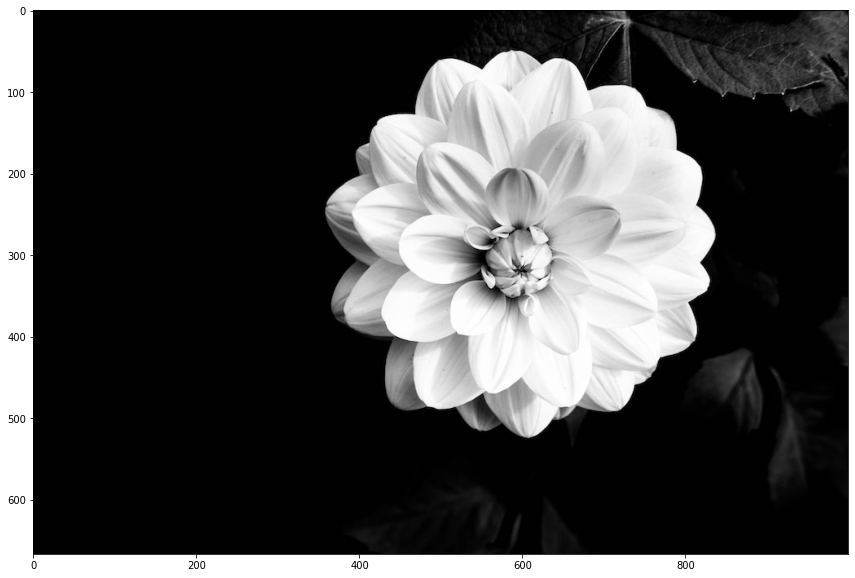

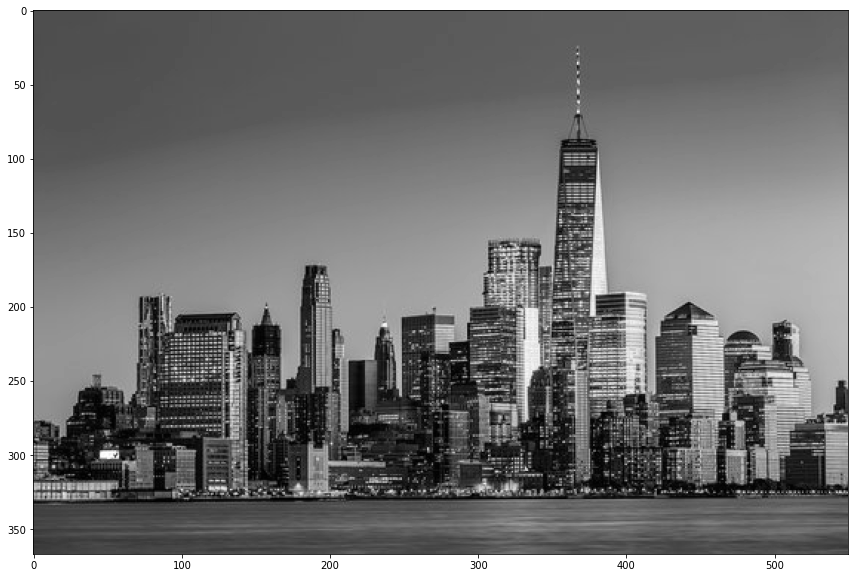

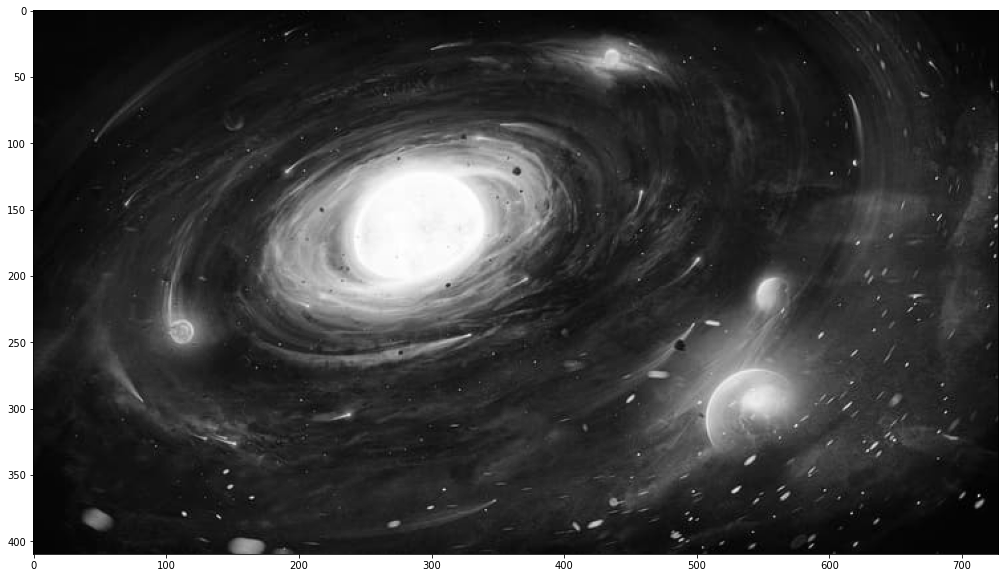

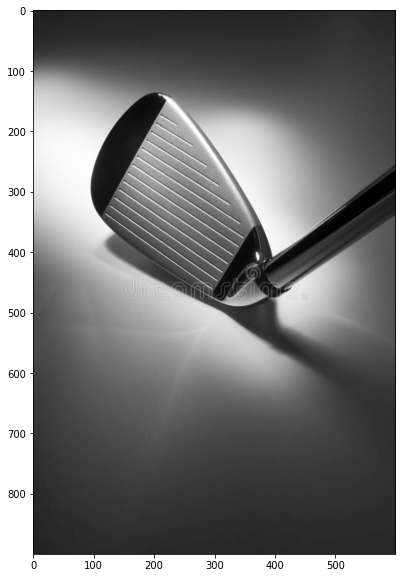

In [8]:
flower_img = np.array(Image.open(flower).convert('L'))
print(flower_img.shape)
vis(flower_img)

newyork_img = np.array(Image.open(newyork).convert('L'))
print(newyork_img.shape)
vis(newyork_img)

universe_img = np.array(Image.open(universe).convert('L'))
print(universe_img.shape)
vis(universe_img)

golf_img = np.array(Image.open(golf).convert('L'))
print(golf_img.shape)
vis(golf_img)

## Sobel

In [9]:
sobel_x = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
]
sobel_y = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1],
]

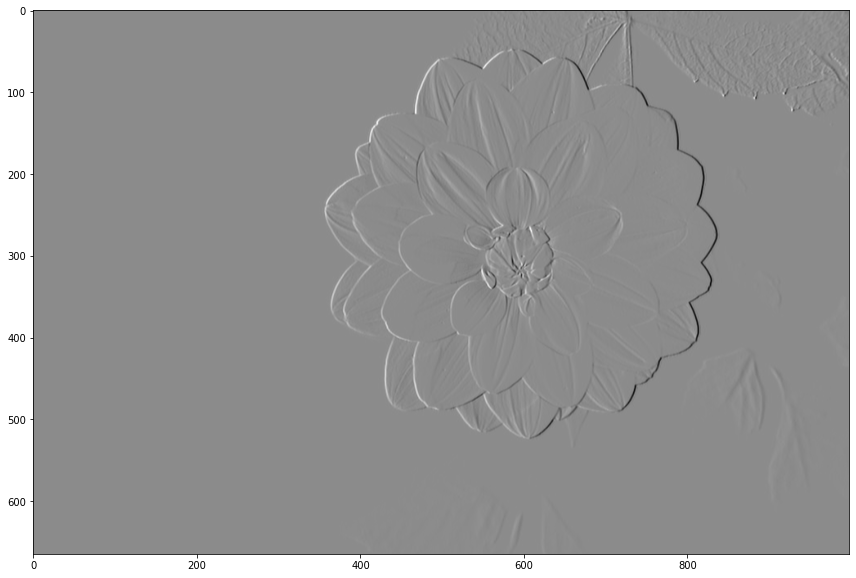

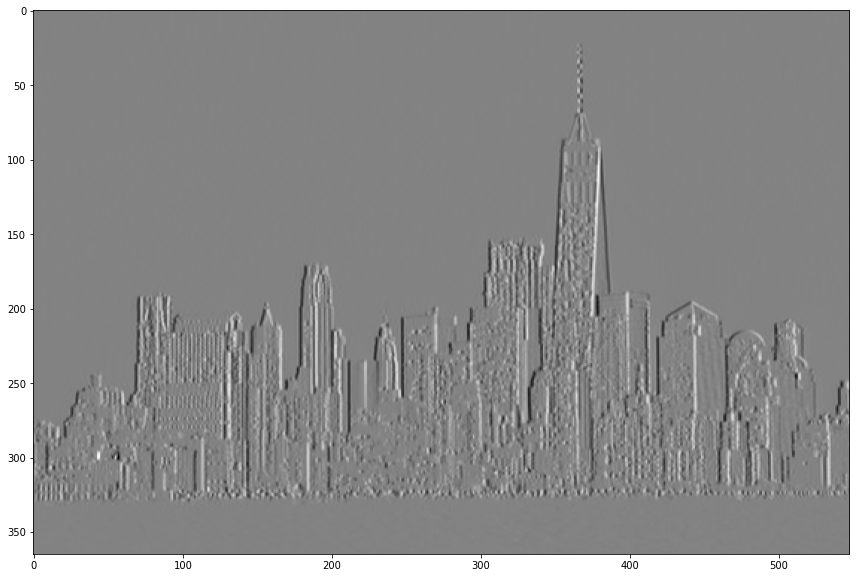

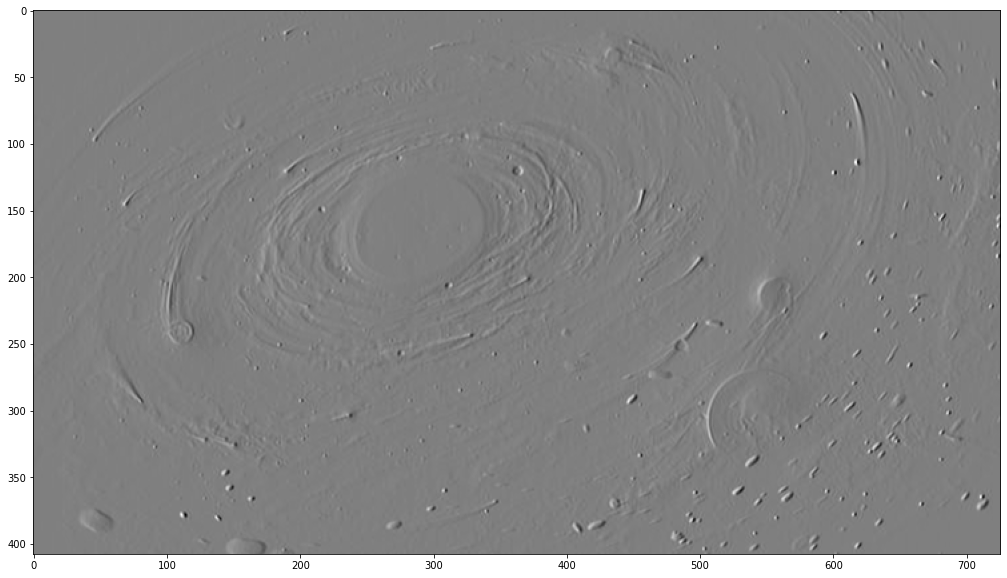

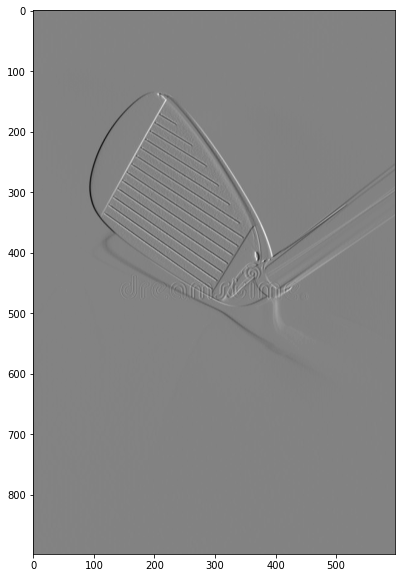

In [10]:
vis(image=convolve(input=flower_img, kernel=sobel_x))
vis(image=convolve(input=newyork_img, kernel=sobel_x))
vis(image=convolve(input=universe_img, kernel=sobel_x))
vis(image=convolve(input=golf_img, kernel=sobel_x))

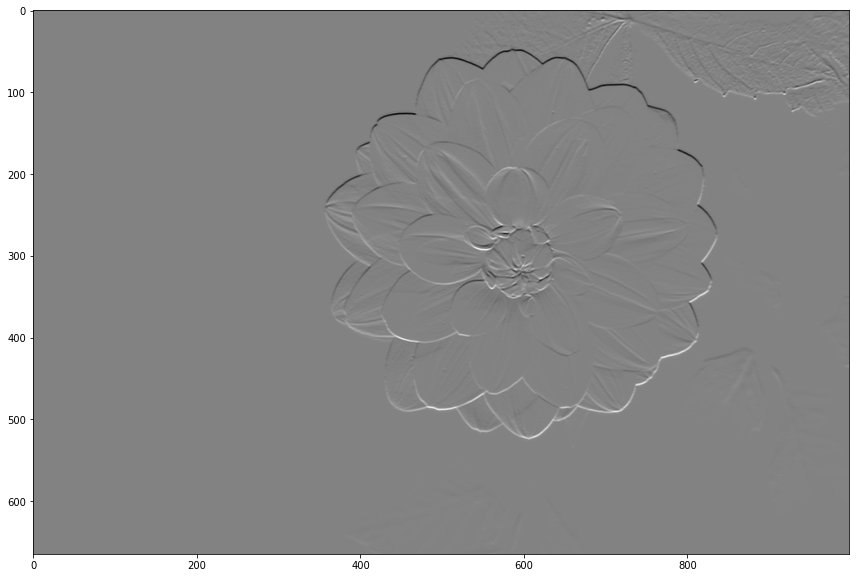

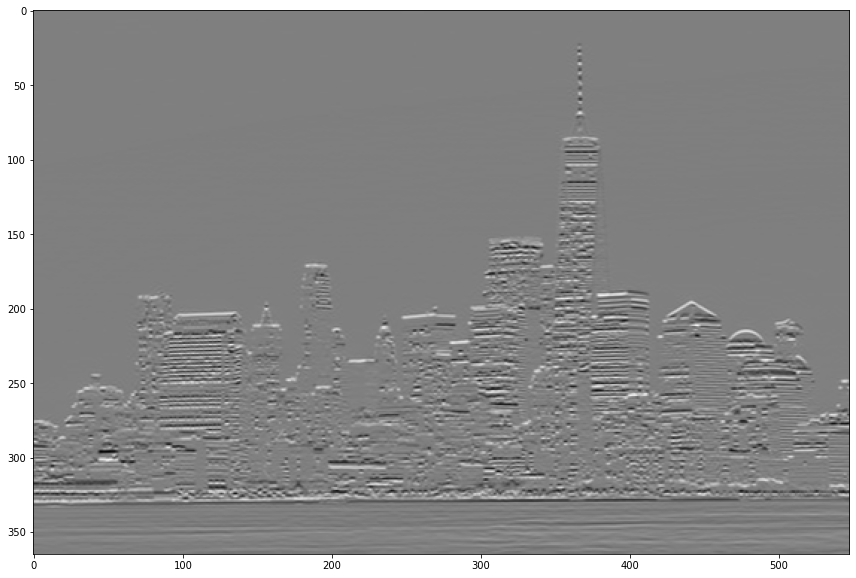

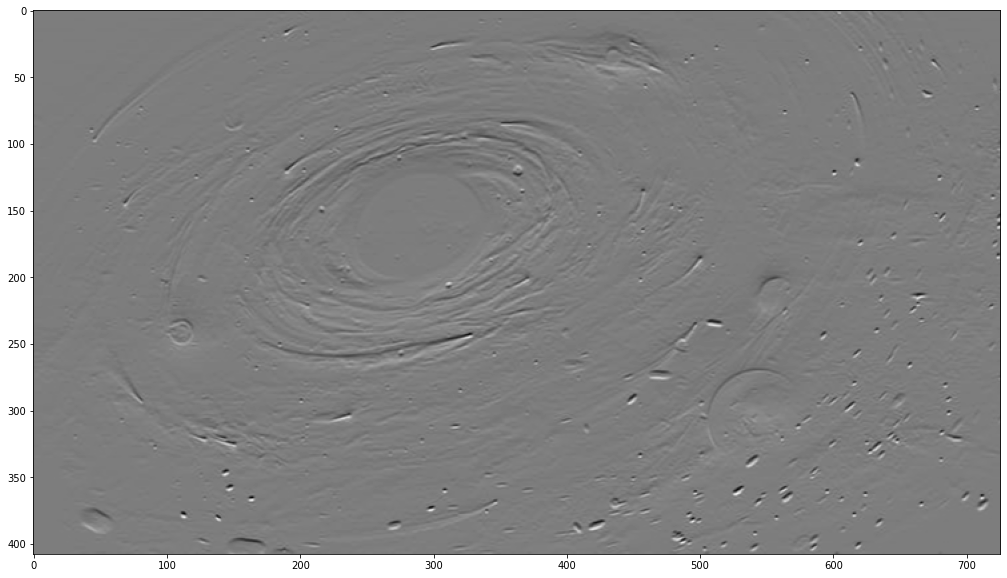

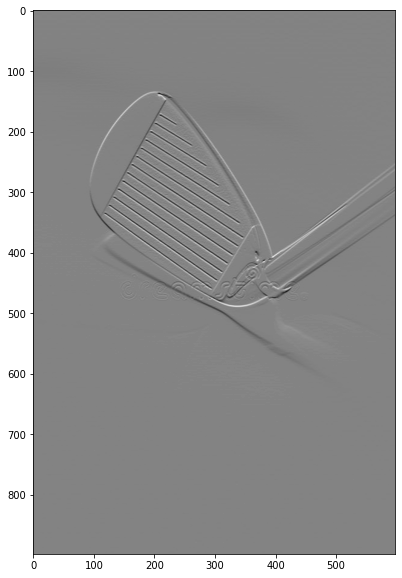

In [11]:
vis(image=convolve(input=flower_img, kernel=sobel_y))
vis(image=convolve(input=newyork_img, kernel=sobel_y))
vis(image=convolve(input=universe_img, kernel=sobel_y))
vis(image=convolve(input=golf_img, kernel=sobel_y))

We can see both sobel_x and sobel_y pick up edges relatively well for these images. However we can see that sobel_x detects the vertical edges of the buildings in new york city much better than sobel_y. This makes sense, because sobel_x is better at detecting vertical edges while sobel_y is better finding horizontal edges.

## Prewitt

In [12]:
prewitt_x = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
]
prewitt_y = [
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1],
]

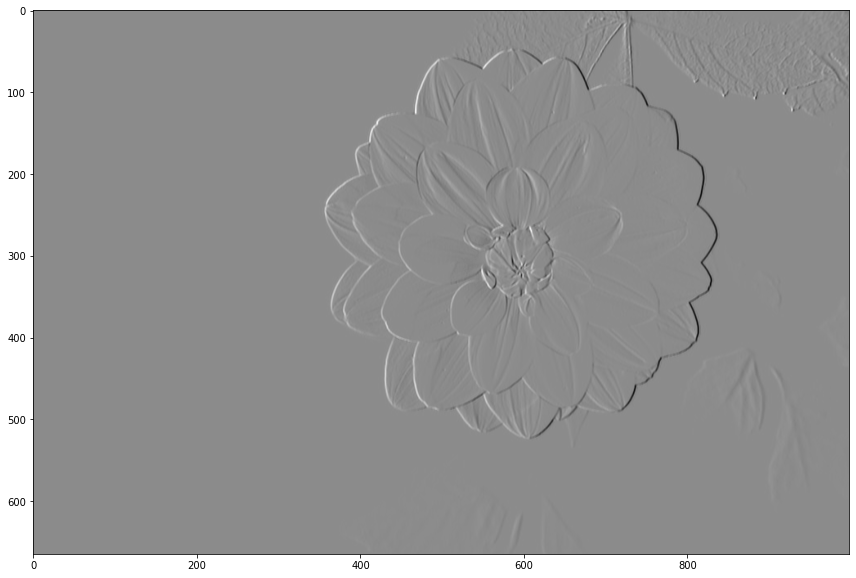

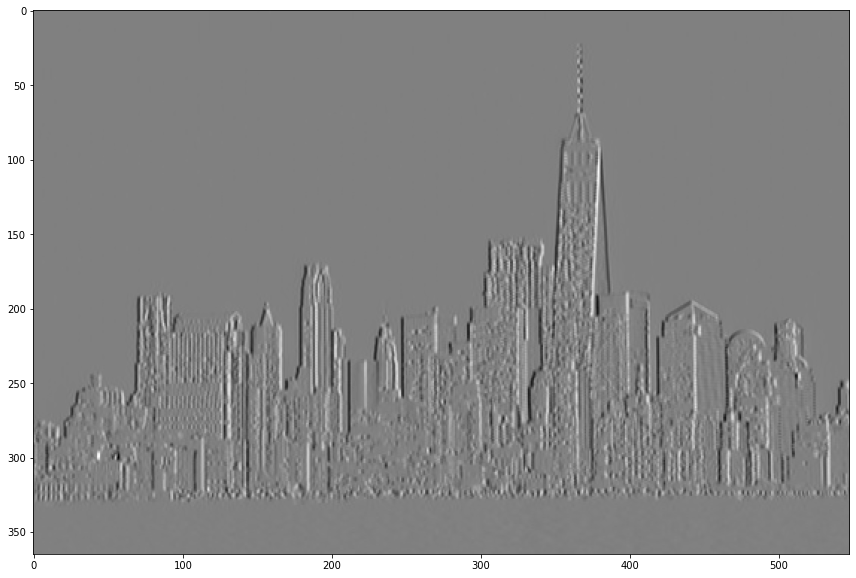

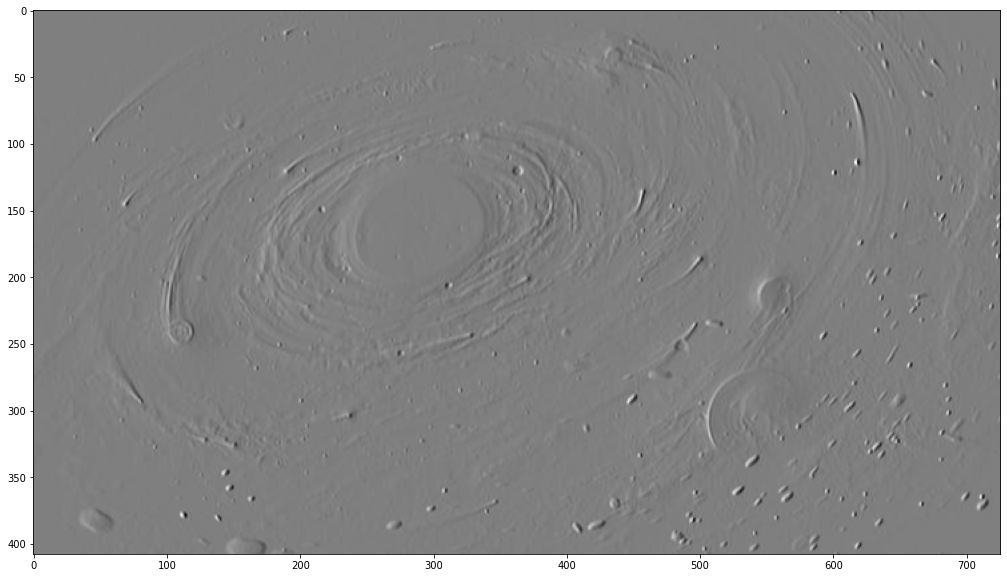

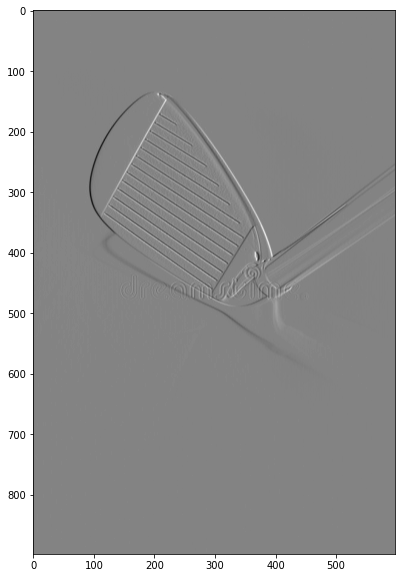

In [13]:
vis(image=convolve(input=flower_img, kernel=prewitt_x))
vis(image=convolve(input=newyork_img, kernel=prewitt_x))
vis(image=convolve(input=universe_img, kernel=prewitt_x))
vis(image=convolve(input=golf_img, kernel=prewitt_x))

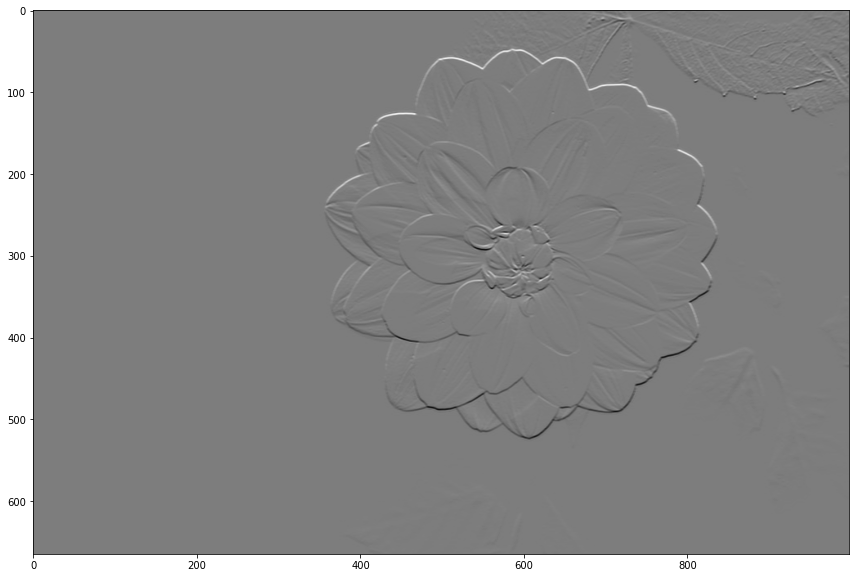

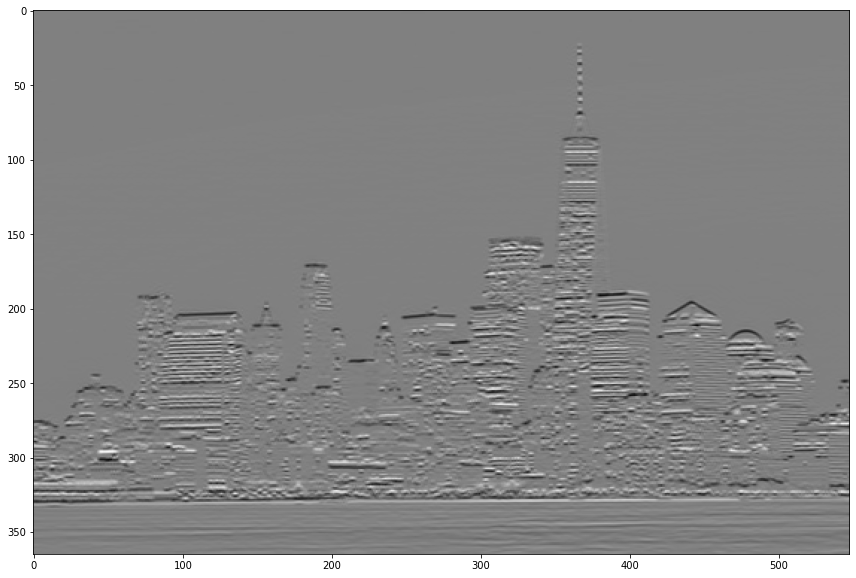

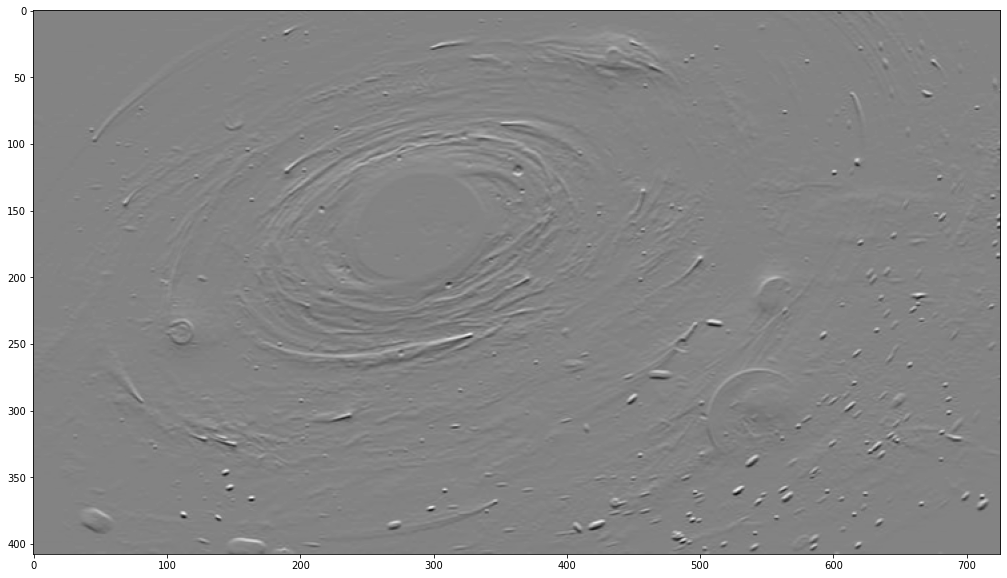

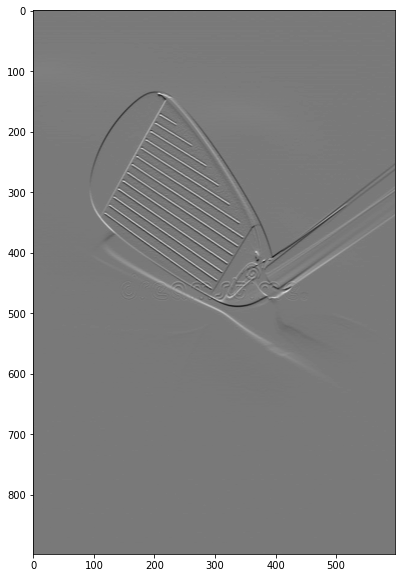

In [14]:
vis(image=convolve(input=flower_img, kernel=prewitt_y))
vis(image=convolve(input=newyork_img, kernel=prewitt_y))
vis(image=convolve(input=universe_img, kernel=prewitt_y))
vis(image=convolve(input=golf_img, kernel=prewitt_y))

The prewitt filters also detect edges quite well, however we can notice the same issue where prewitt_x detects the vertical edges of the new york buildings very well, while prewitt_y does not. The filters perform well on all the other images though. 

## OpenCV

### Sobel

In [ ]:
# vis(image=cv.Sobel(flower_img, cv.CV_64F, 1, 0, 3))
# vis(image=cv.Sobel(newyork_img, cv.CV_64F, 1, 0, 3))
# vis(image=cv.Sobel(universe_img, cv.CV_64F, 1, 0, 3))
# vis(image=cv.Sobel(golf_img, cv.CV_64F, 1, 0, 3))

In [ ]:
# vis(image=cv.Sobel(flower_img, cv.CV_64F, 0, 1, 3))
# vis(image=cv.Sobel(newyork_img, cv.CV_64F, 0, 1, 3))
# vis(image=cv.Sobel(universe_img, cv.CV_64F, 0, 1, 3))
# vis(image=cv.Sobel(golf_img, cv.CV_64F, 0, 1, 3))

### Prewitt

In [ ]:
# vis(image=cv.filter2D(flower_img, -1, np.array(prewitt_x)))
# vis(image=cv.filter2D(newyork_img, -1, np.array(prewitt_x)))
# vis(image=cv.filter2D(universe_img, -1, np.array(prewitt_x)))
# vis(image=cv.filter2D(golf_img, -1, np.array(prewitt_x)))

**Morphological Analysis: Dilation**

Now, I will implement a morphological method, particularly Dilation. This procedure will 'expand' shapes until they are bigger to fill in holes and gaps. We will perform this method on the golf image, as it has lines to fill in

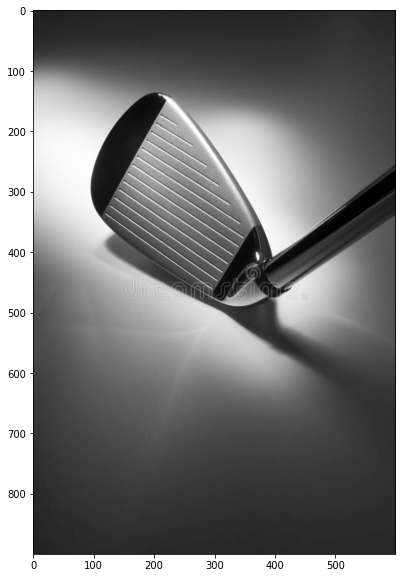

In [15]:
vis(golf_img)

In [16]:
def dilate(img, filter):
  if (np.count_nonzero(filter==0) + np.count_nonzero(filter==1)) != filter.size:
    raise ValueError("filter must be binary (only contain 1's and 0's)!")
  if filter.shape[0] % 2 != 1 or filter.shape[0] != filter.shape[1]:
    raise ValueError("filter must be square and odd (e.g. 3x3, 5x5, etc, NOT 4x4)")
  n = filter.shape[0]
  padded_img = np.pad(img, pad_width=filter.shape[0]//2, mode='constant', constant_values=0)
  new_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      patch = padded_img[i:i+n, j:j+n]
      max_val = np.max(patch*filter)
      new_img[i][j] = max_val
  return new_img

(900, 600)
i= 0
i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9


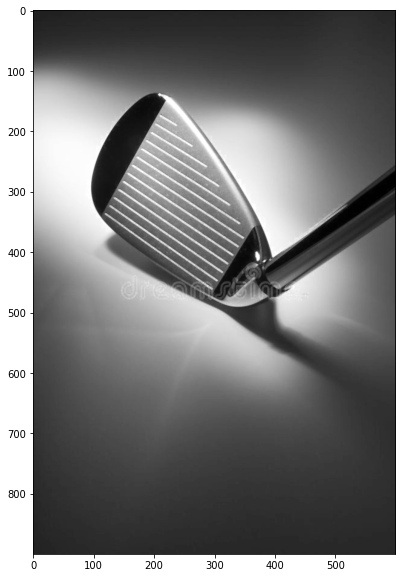

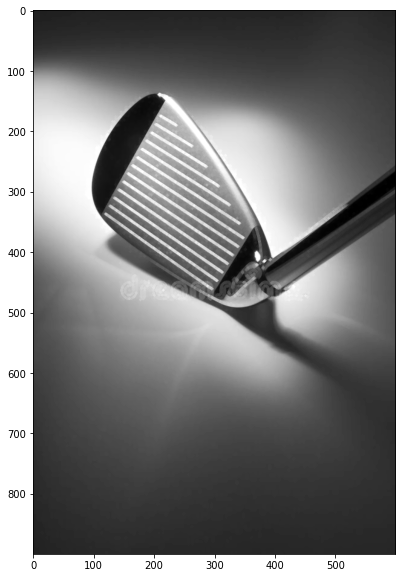

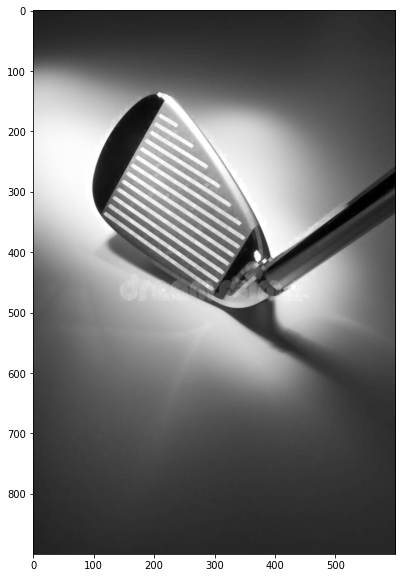

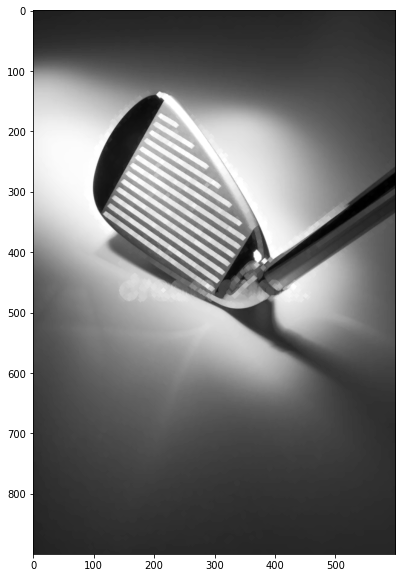

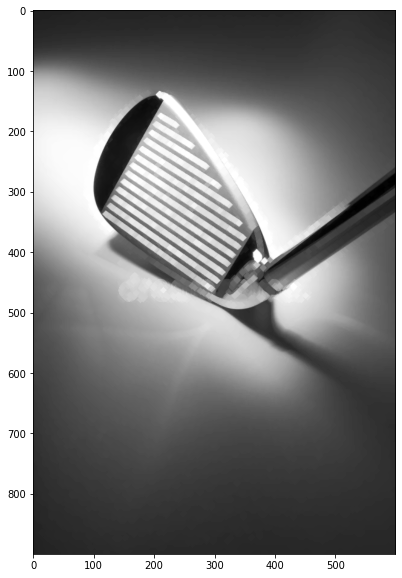

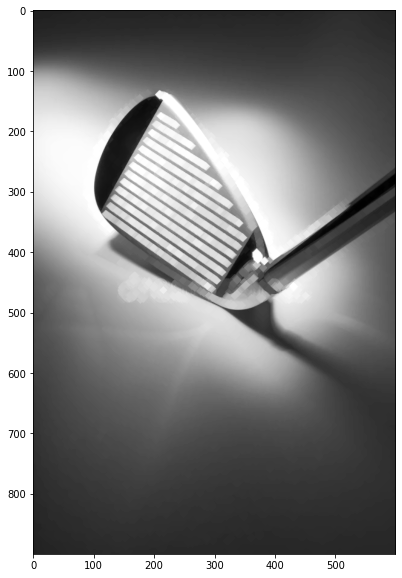

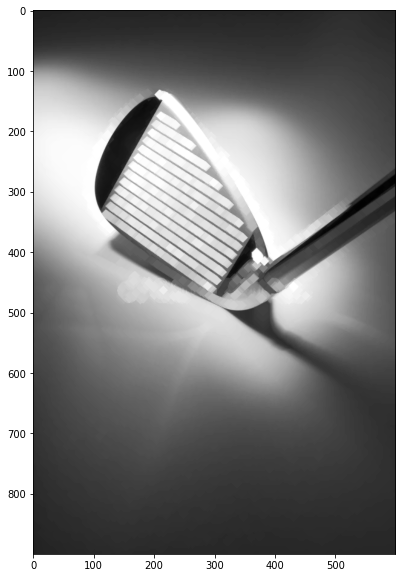

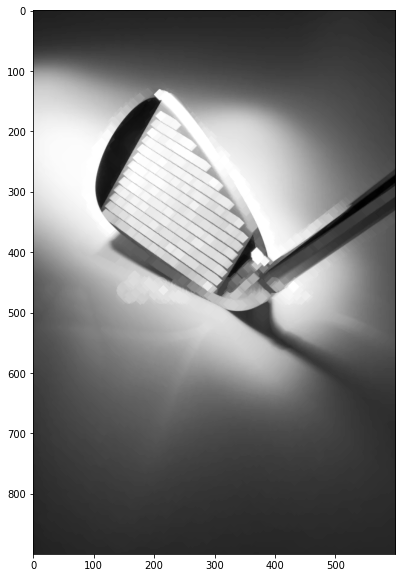

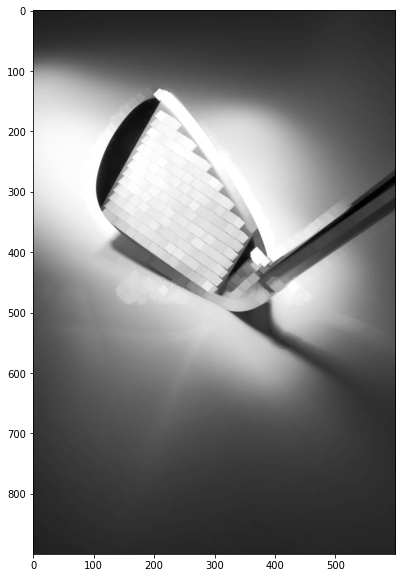

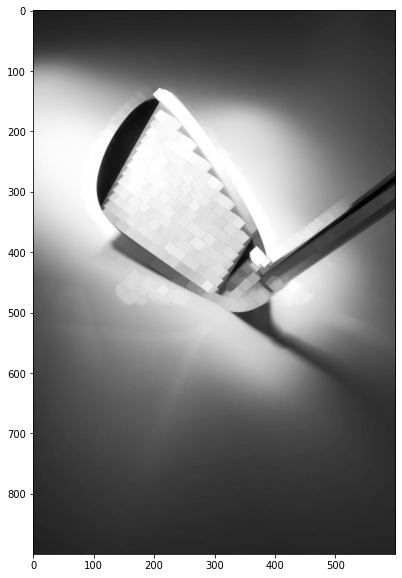

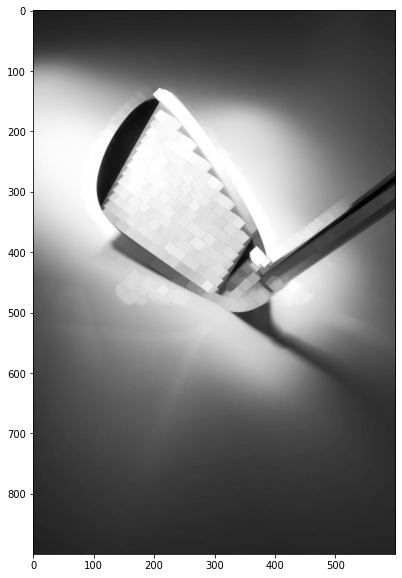

In [17]:
print(golf_img.shape)
f = np.array([[0, 1, 0],
              [1, 1, 1],
              [0, 1, 0]])

# we will apply the algorithm multiple times
new_golf_img = golf_img
for i in range(10):
  print('i=', i)
  new_golf_img = dilate(new_golf_img, f)
  vis(new_golf_img)


vis(new_golf_img)

We can also apply it to an image of patterns / textures:

(299, 458)


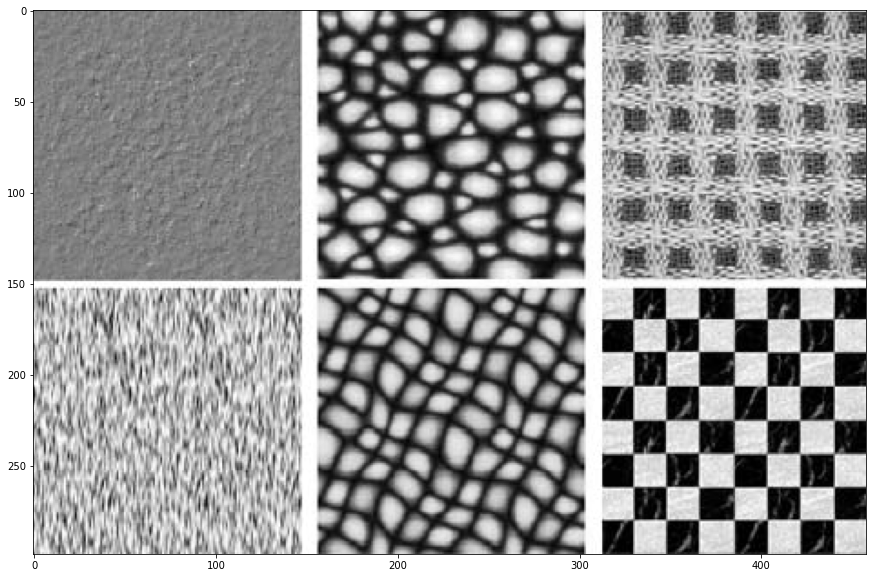

In [18]:
textures_img = np.array(Image.open("/content/drive/MyDrive/CV-lab1-photos/textures.png").convert('L'))
print(textures_img.shape)
vis(textures_img)

(299, 458)
i= 0
i= 1
i= 2
i= 3
i= 4


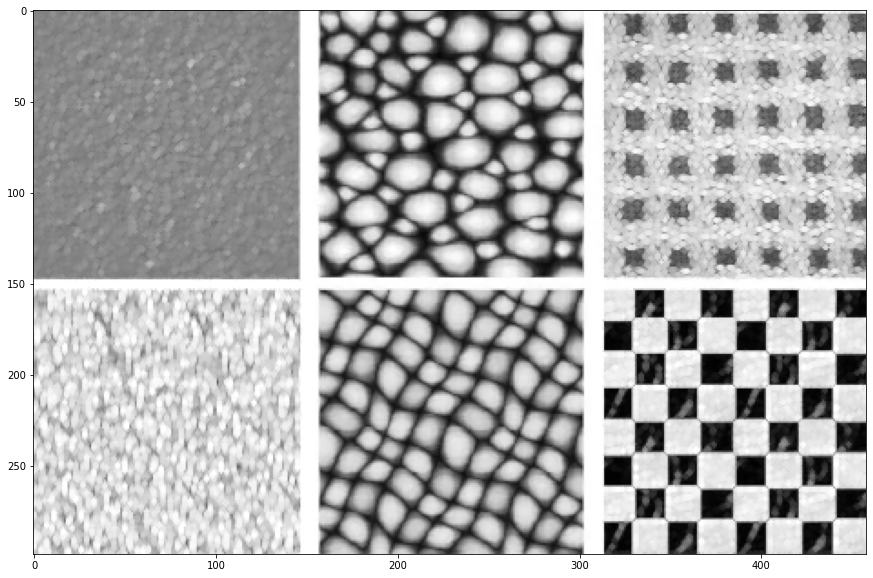

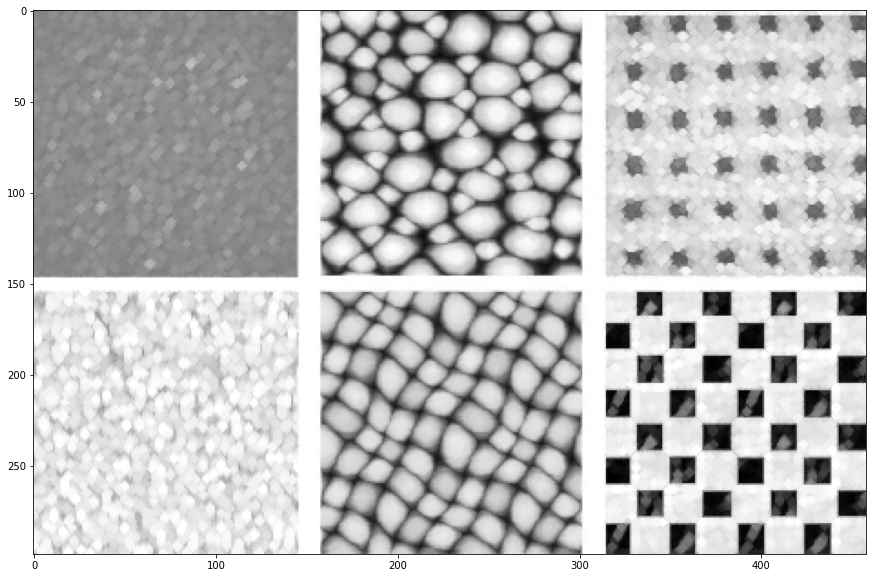

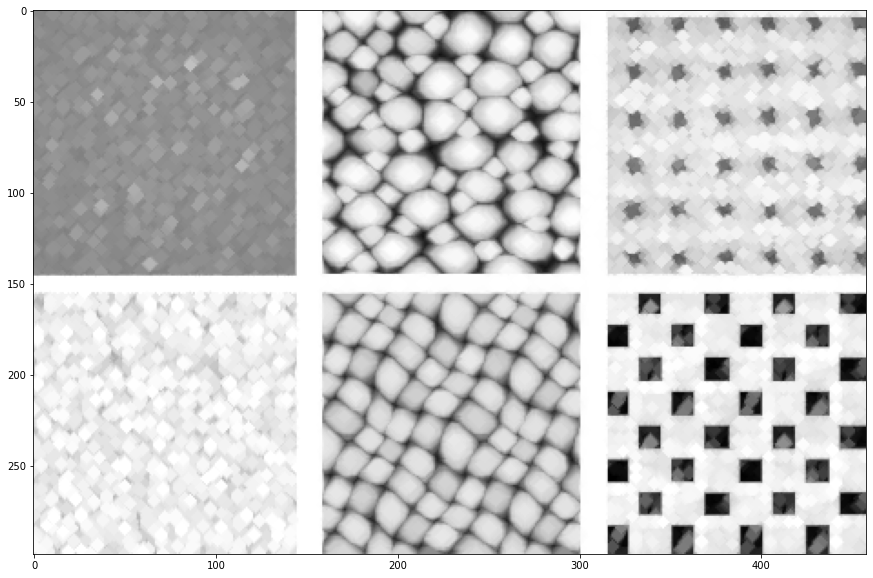

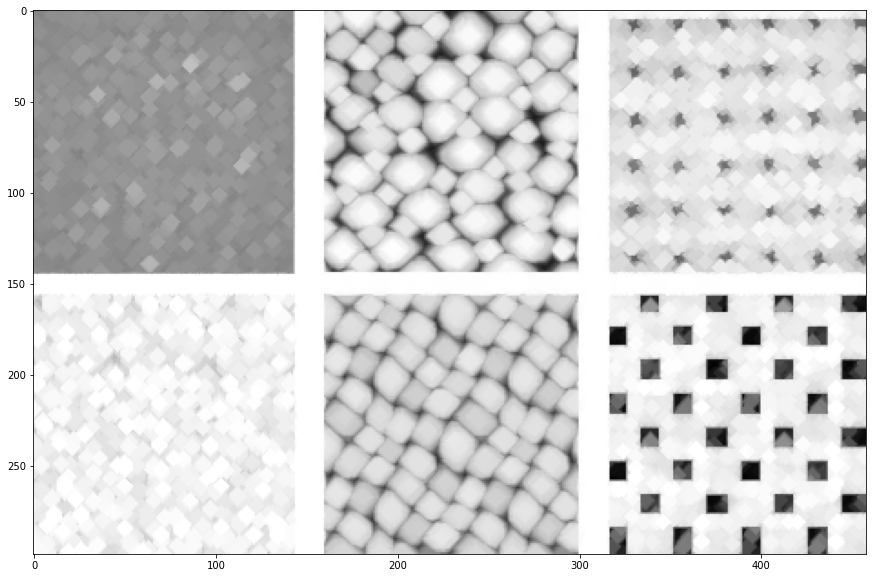

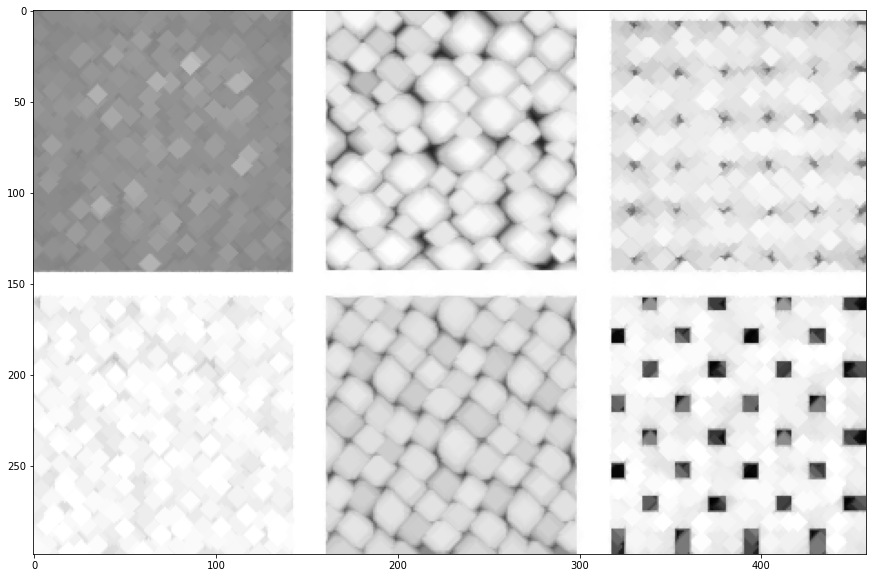

In [19]:
print(textures_img.shape)
f = np.array([[0, 1, 0],
              [1, 1, 1],
              [0, 1, 0]])

# we will apply the algorithm multiple times
new_textures_img = textures_img
for i in range(5):
  print('i=', i)
  new_textures_img = dilate(new_textures_img, f)
  vis(new_textures_img)